<a href="https://colab.research.google.com/github/abhaykukade/image-classification/blob/main/img_classification_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APIs

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(55000, 28, 28)

Scaling the pixel intensities down to the 0-1 range

In [4]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Samples from data

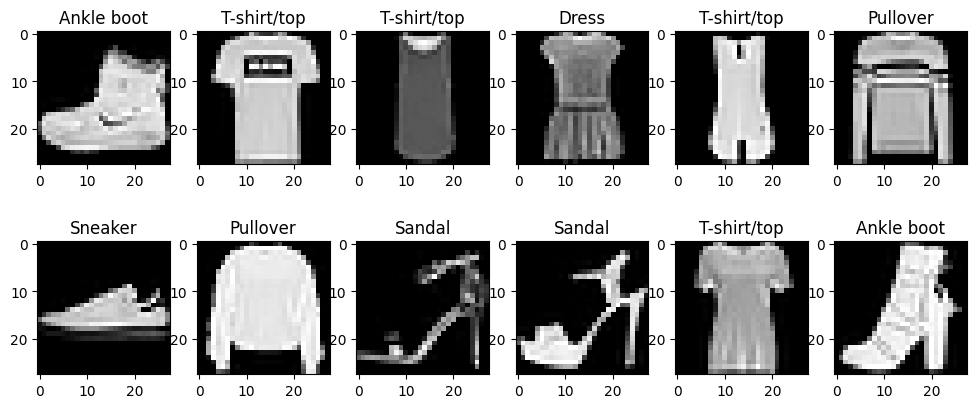

In [6]:
fig, axes = plt.subplots(2, 6, figsize=(12, 5))
axes = axes.flatten()

for i, ax in zip(range(12), axes):
  ax.imshow(X=X_train[i,:], cmap='gray')
  ax.set_title(class_names[y_train[i]])


# MLP Model using sequential API

In [7]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [10]:
model.get_layer('dense')

<Dense name=dense, built=True>

The parameters of a layer can be accessed as:

In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.05997331, -0.06665765, -0.05376589, ..., -0.03031502,
        -0.07213434, -0.06404602],
       [ 0.06729293, -0.01472201, -0.06815808, ...,  0.02830955,
         0.04976363,  0.0409699 ],
       [ 0.04208304,  0.05407241,  0.06381497, ...,  0.00657244,
         0.06584674, -0.06571811],
       ...,
       [ 0.02005213,  0.0469675 , -0.04023942, ..., -0.02805183,
        -0.03356325, -0.03119523],
       [ 0.00645376, -0.01300479,  0.0409834 , ...,  0.03790801,
         0.00014403, -0.04182895],
       [ 0.07275806,  0.04047168, -0.0087407 , ..., -0.00704201,
         0.06268084, -0.04847104]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

# Compiling the model

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Training and Evaluating the model

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6815 - loss: 1.0021 - val_accuracy: 0.8290 - val_loss: 0.5081
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8250 - loss: 0.5081 - val_accuracy: 0.8394 - val_loss: 0.4558
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8418 - loss: 0.4537 - val_accuracy: 0.8464 - val_loss: 0.4311
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8517 - loss: 0.4237 - val_accuracy: 0.8528 - val_loss: 0.4148
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8589 - loss: 0.4024 - val_accuracy: 0.8552 - val_loss: 0.4039
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8644 - loss: 0.3854 - val_accuracy: 0.8578 - val_loss: 0.3941
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8694 - loss: 0.3712 - val_accuracy: 0.8578 - val_loss: 0.3887
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8736 - loss: 0.3588 - 

# Plotting Results

<Axes: xlabel='Epoch'>

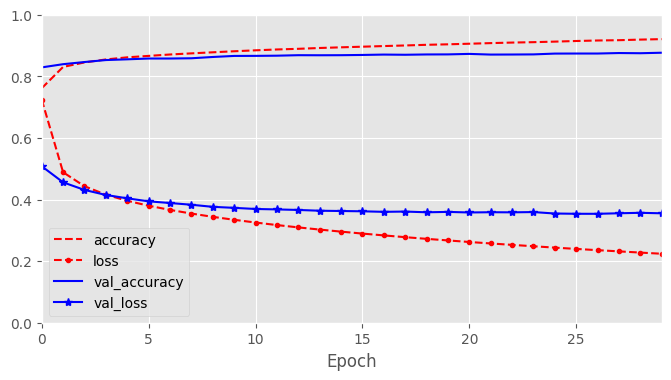

In [25]:
plt.style.use('ggplot')
pd.DataFrame(history.history).plot(
    figsize=(8, 4), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch'
    ,style=['r--', 'r--.', 'b-', 'b-*']
)

# Evaluating on test data

In [26]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8711 - loss: 0.3774


[0.3736993670463562, 0.8718000054359436]